In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from useful_func import *
import os

In [2]:
fs = 40
fs2 = 40/100

In [3]:
df = pd.read_csv('info_events.csv', index_col=0)
df['Picked arrival'] = pd.to_datetime(df['Picked arrival'])
df['file_start'] = pd.to_datetime(df['file_start'])
diff = (df['Picked arrival']- df['file_start'])
df['diff'] = diff.dt.total_seconds()
df['signal_to_end'] = np.array([len(np.fromfile(file, dtype = np.int32))/fs for file in df['file']]) - df['diff']
df = df.sort_values(by='Picked arrival')


In [4]:
all_files = []
for dossier_actuel, sous_dossiers, fichiers in os.walk('data\DonneesB23'):
    if "_MACOSX" not in dossier_actuel:
        for fichier in fichiers:
            if '.DS_Store' not in fichier:
                path = os.path.join(dossier_actuel, fichier)
                y = np.fromfile(path, dtype=np.int32)
                if len(y)/fs > 2*60*60 :
                    all_files.append(path)
del y
noisy_files = []
known_files = list(df['file'].unique())
for file in all_files :
    if file not in known_files :
        noisy_files.append(file)

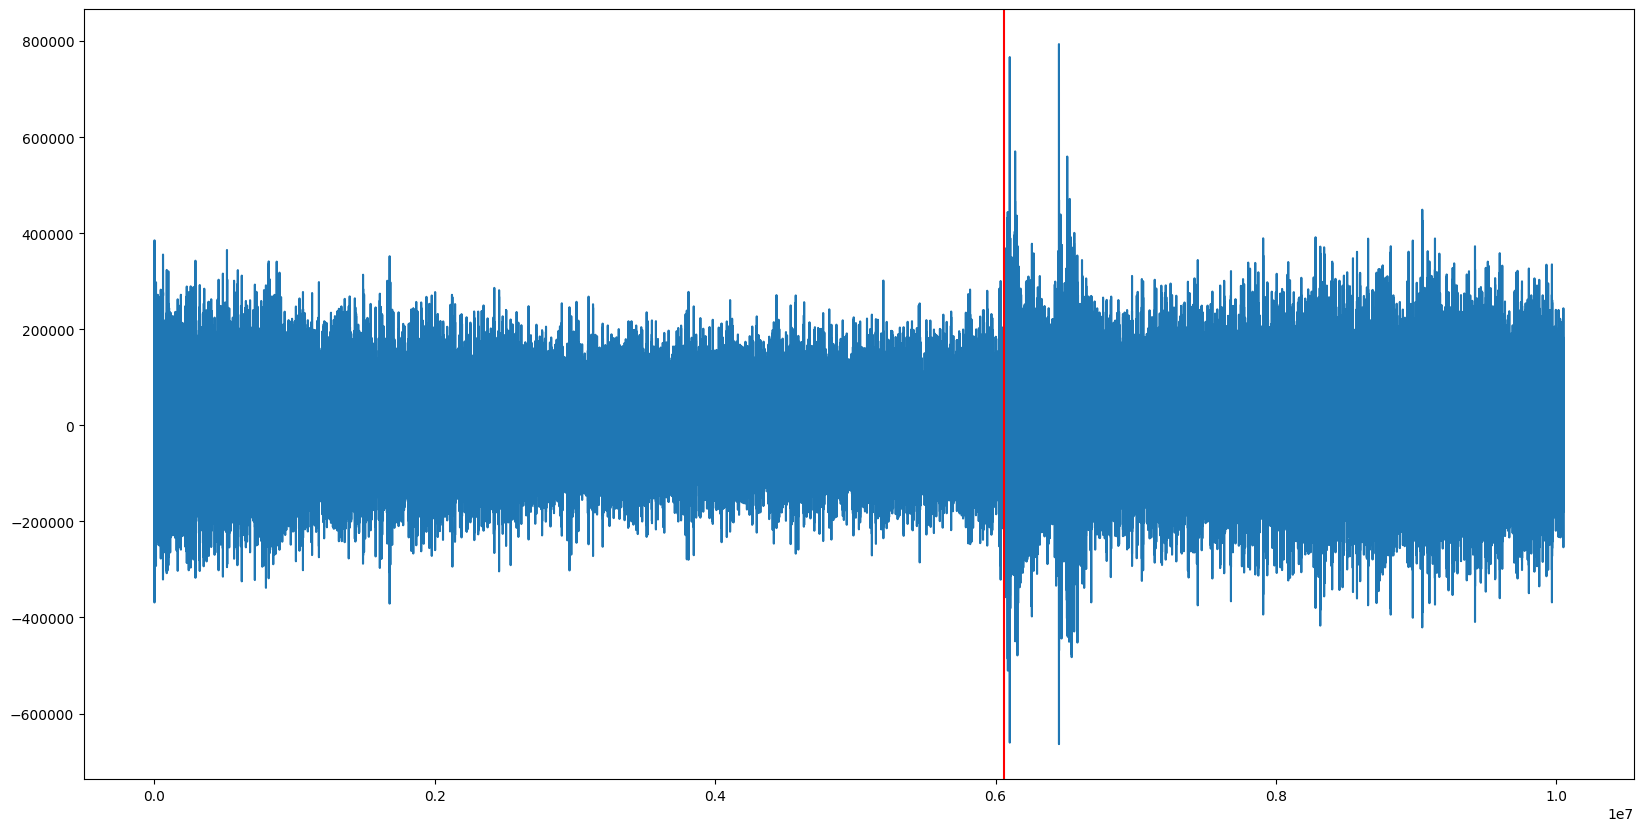

In [5]:
file = df[df['Tag'] == 'REQ']['file'].iloc[0]
time = df[df['Tag'] == 'REQ']['diff'].iloc[0]
y = np.fromfile(file, dtype=np.int32)
plt.figure(figsize=(20,10))
plt.plot(bp(y, fs=40, lowcut=0.05, highcut=0.1))
plt.axvline(x=time*fs, color='r')

In [14]:
i = 0

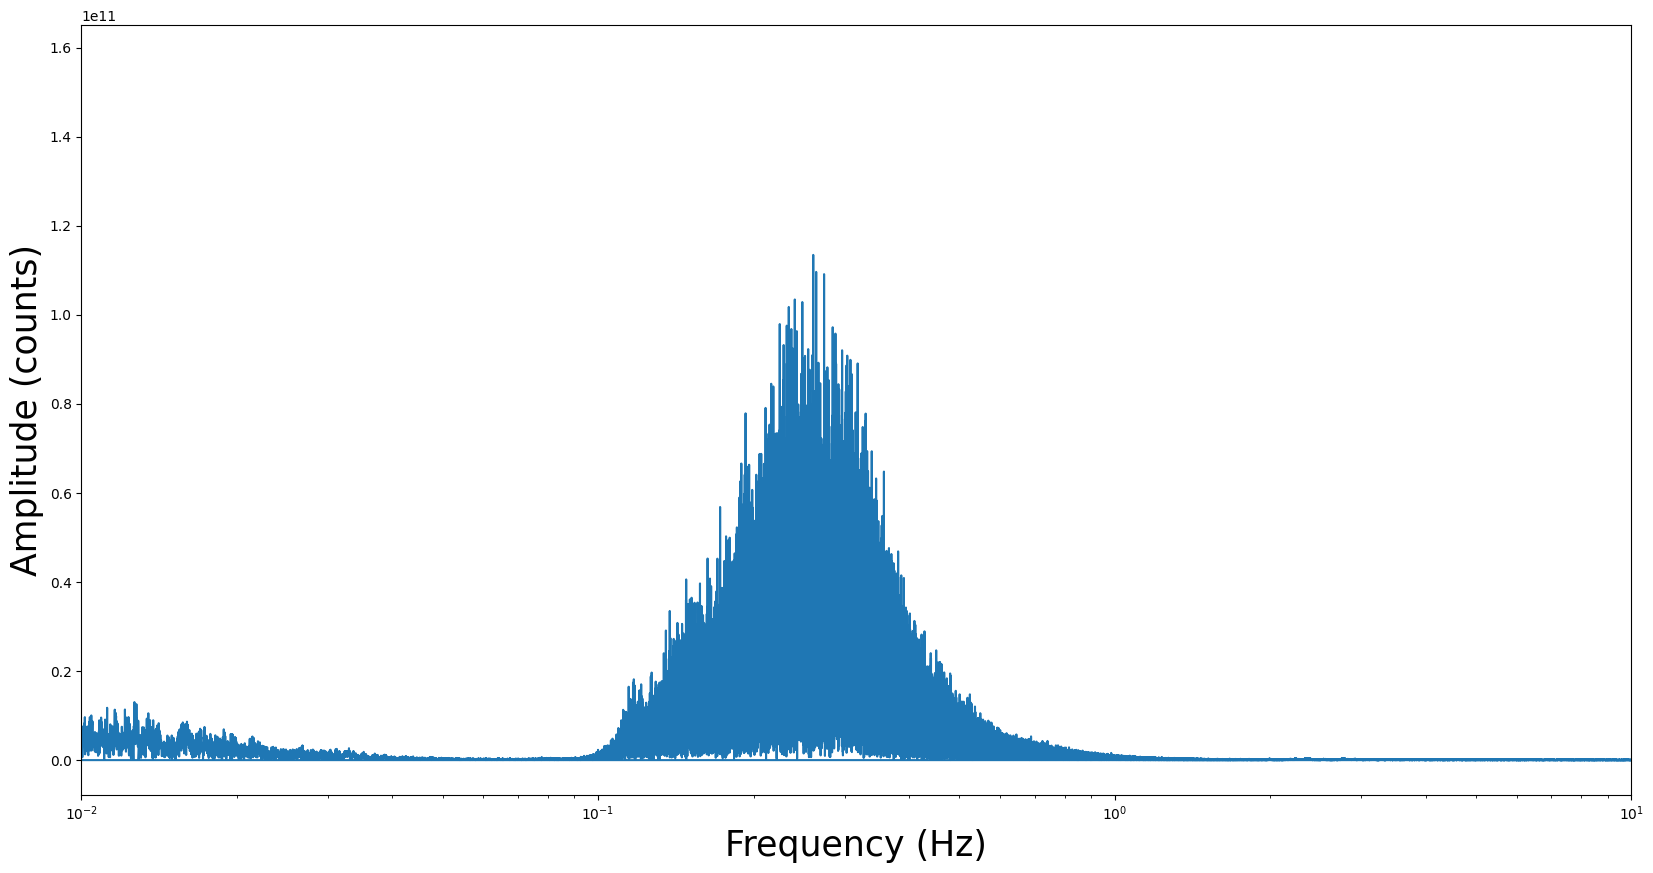

In [15]:
file = df['file'].iloc[i]
time = df['diff'].iloc[i]
y = np.fromfile(file, dtype=np.int32)
T = np.arange(0, len(y))/fs

fft_y = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), d=1/fs)
plt.figure(figsize=(20,10))
plt.plot(freq, np.abs(fft_y))
plt.xlabel('Frequency (Hz)', fontsize=25)
plt.ylabel('Amplitude (counts)', fontsize=25)
plt.xscale('log')  # Utilisation de l'échelle logarithmique pour l'axe des x
plt.xlim([0.01, 10])  # Limiter la plage des fréquences pour éviter les valeurs négatives
plt.show()
i+=1

In [20]:
i = 0

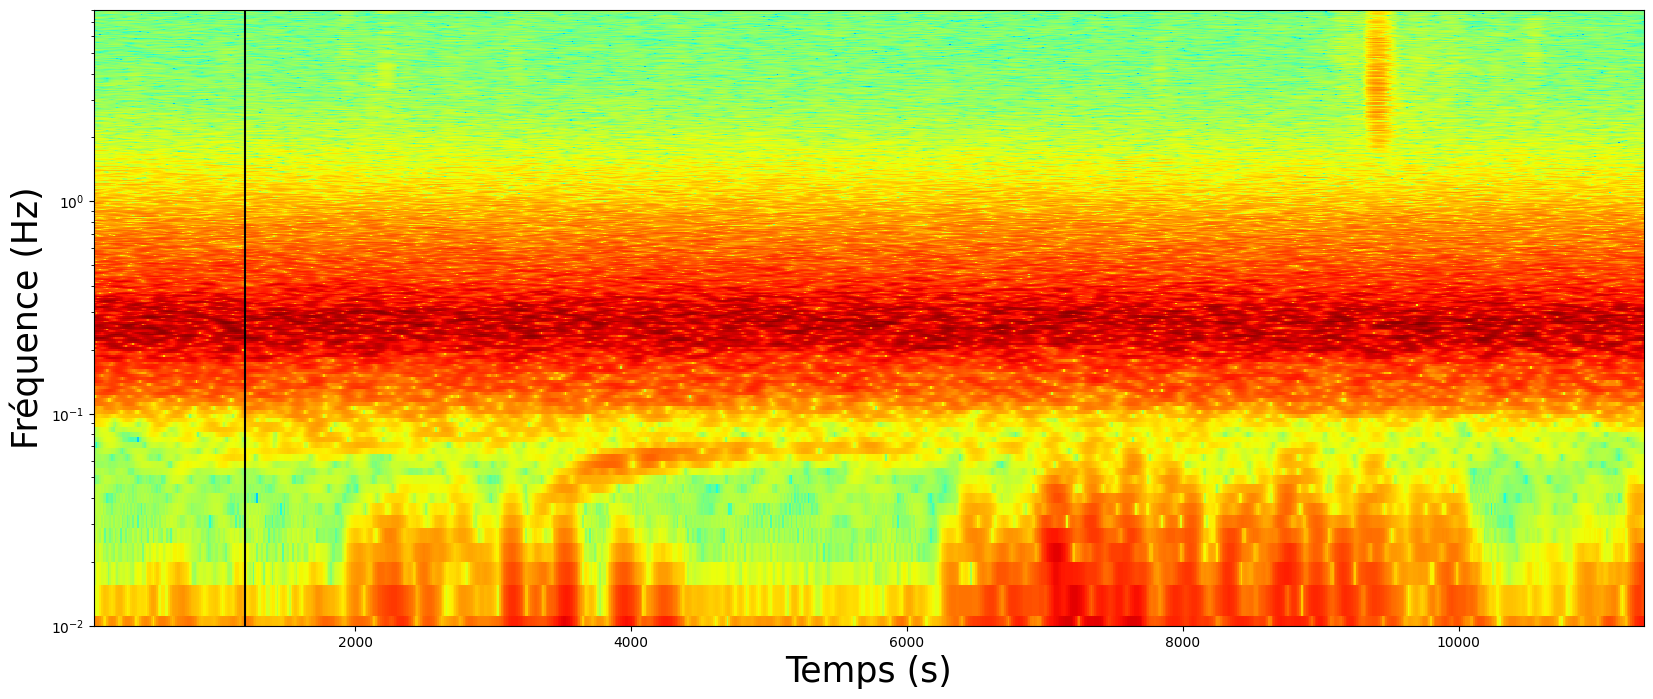

In [23]:
file = df[df['Tag'] == '*']['file'].iloc[i]
time = df[df['Tag'] == '*']['diff'].iloc[i]
y = np.fromfile(file, dtype=np.int32)
ys = y[int(time*fs-20*60*fs):int(time*fs+8*60*60*fs)]

# Compute spectrogram
f, t, Sxx = signal.spectrogram(ys, fs, nperseg=9000, noverlap=8500, window='hann')

plt.figure(figsize=(20,8))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto', cmap='jet')
#plt.title('Spectrogramme '+str(df[df['Tag'] != 'DET']['Tag'].iloc[i]))
plt.xlabel('Temps (s)', fontsize=25)
plt.ylabel('Fréquence (Hz)', fontsize=25)
plt.yscale('log')
plt.ylim([.01, 8])
plt.axvline(20*60, color='black')
#plt.ylim([.5, 2])
#plt.colorbar(label='Puissance (dB/Hz)')
plt.show()
i+=1